In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor

In [2]:
calories = pd.read_csv(r'C:\Users\HP\Downloads\calories.csv')
print(calories)

        User_ID  Calories
0      14733363       231
1      14861698        66
2      11179863        26
3      16180408        71
4      17771927        35
...         ...       ...
14995  15644082        45
14996  17212577        23
14997  17271188        75
14998  18643037        11
14999  11751526        98

[15000 rows x 2 columns]


In [3]:
exercise = pd.read_csv(r'C:\Users\HP\Downloads\exercise.csv')
print(exercise)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68     190      94        29         105       40.8
1      14861698  female   20     166      60        14          94       40.3
2      11179863    male   69     179      79         5          88       38.7
3      16180408  female   34     179      71        13         100       40.5
4      17771927  female   27     154      58        10          81       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20     193      86        11          92       40.4
14996  17212577  female   27     165      65         6          85       39.2
14997  17271188  female   43     159      58        16          90       40.1
14998  18643037    male   78     193      97         2          84       38.3
14999  11751526    male   63     173      79        18          92       40.5

[15000 rows x 8 columns]


In [4]:
calories_new = pd.concat([exercise , calories['Calories']],axis = 1)
calories_new.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [5]:
calories_new.shape
calories_new.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [6]:
calories_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


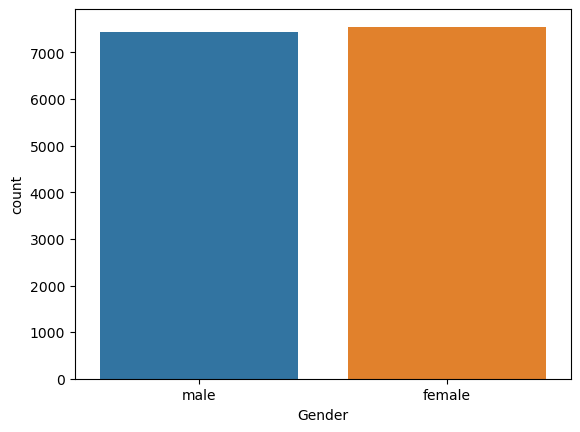

In [7]:
sns.countplot(x='Gender' , data=calories_new)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

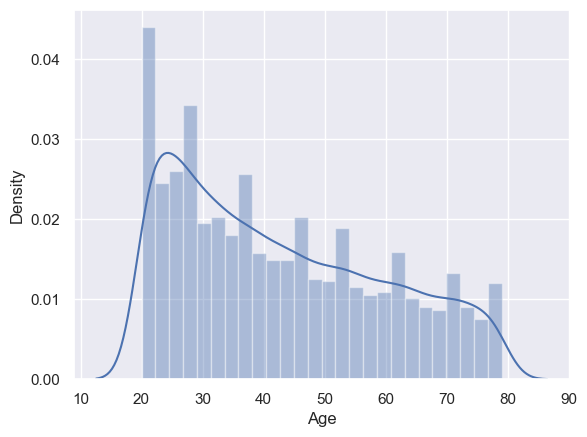

In [8]:
sns.set()
sns.distplot(calories_new['Age'])

<Axes: xlabel='Height', ylabel='Density'>

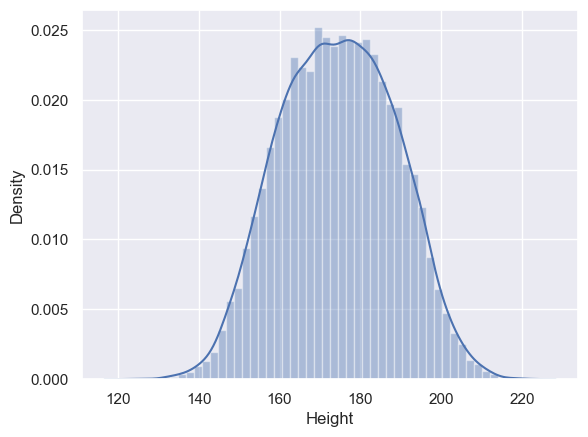

In [9]:
sns.distplot(calories_new['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

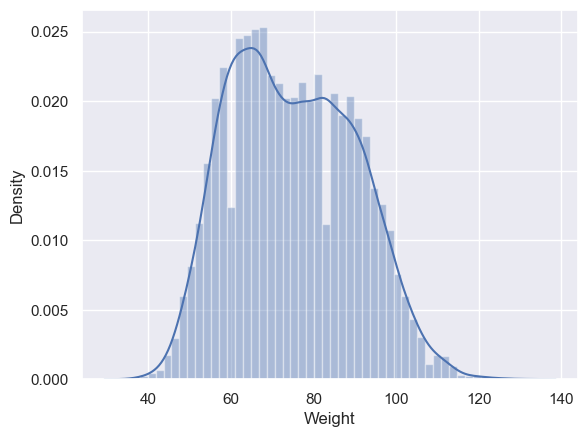

In [10]:
sns.distplot(calories_new['Weight'])

<Axes: xlabel='Calories', ylabel='Density'>

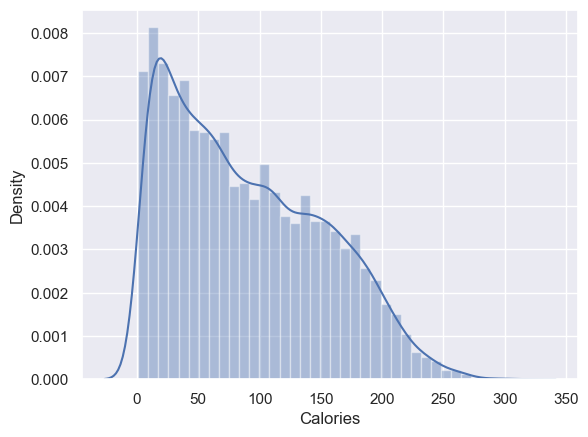

In [11]:
sns.distplot(calories_new['Calories'])

In [12]:
calories_new.replace({'Gender':{'male':0,'female':1}},inplace=True)
calories_new.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


In [13]:
correlation = calories_new.corr()

<Axes: >

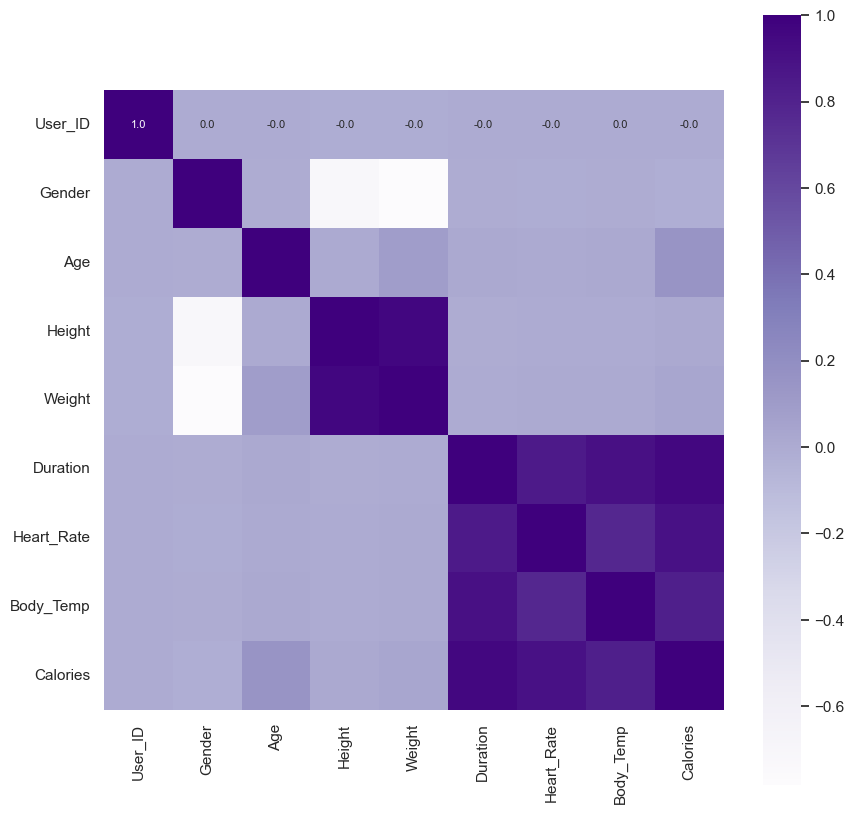

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

In [20]:
X=calories_new.drop(['User_ID','Calories'],axis=1)
Y=calories_new['Calories']

In [21]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [22]:
print(Y)

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64


In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [25]:
model = XGBRegressor()

In [26]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
prediction = model.predict(X_test)

In [28]:
print(prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [29]:
mae = metrics.mean_absolute_error(Y_test,prediction)

In [30]:
print(" The mean absolute error " , mae)

 The mean absolute error  1.4833678883314132


In [31]:
input_data = (0,56,190.0,94.0,29.0,105.0,40.8,231)
print("the calories burnt for the first person is ", prediction[0])

the calories burnt for the first person is  125.58828


In [ ]:
print("prediction of calories burnt is sucessfull")
print("thanks")